## Imports

In [12]:
from phate import PHATE

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from umap import UMAP

from sklearn.manifold import TSNE

## Loading Data

In [2]:
data_path = "data/processed_bert.csv"

data = pd.read_csv(data_path)

display(data.head())

text_embeddings = data[[str(i) for i in range(768)]].values

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,target,text
0,-0.822546,-0.472057,-0.579868,0.601334,0.001131,-0.033307,0.621883,0.219169,-0.297440,-0.999933,...,0.746353,0.789280,0.454223,0.652186,0.384898,-0.173033,-0.653783,0.722890,1,Our Deeds are the Reason of this #earthquake M...
1,-0.932106,-0.444832,-0.946184,0.783482,0.649199,-0.417868,0.810984,0.553593,-0.841144,-0.999991,...,0.972591,0.666550,-0.809021,0.077952,0.690775,-0.809868,-0.695485,0.752990,1,Forest fire near La Ronge Sask. Canada
2,-0.786213,-0.454594,-0.989117,0.766382,0.825029,-0.260707,0.601579,0.324533,-0.961853,-0.999995,...,0.992954,0.505823,-0.130431,-0.429334,0.774262,-0.879583,-0.601859,0.773692,1,All residents asked to 'shelter in place' are ...
3,-0.929848,-0.641187,-0.984187,0.838084,0.698074,-0.439465,0.848216,0.544355,-0.940431,-0.999996,...,0.995336,0.807030,-0.736760,-0.092651,0.772516,-0.862276,-0.756446,0.812085,1,"13,000 people receive #wildfires evacuation or..."
4,-0.782167,-0.475203,-0.785371,0.579609,0.718675,-0.169704,0.333027,0.279532,-0.594330,-0.999871,...,0.968012,0.792530,0.080506,0.567232,0.400888,-0.405238,-0.665966,0.872382,1,Just got sent this photo from Ruby #Alaska as ...


## Using PHATE for visualization

Calculating PHATE...
  Running PHATE on 7613 observations and 768 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.76 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 4.19 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/codygrogan/.local/lib/python3.12/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 208 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/home/codygrogan/.local/lib/python3.12/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated SVD in 0.58 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.05 seconds.
  Calculated landmark operator in 4.39 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 1.99 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.73 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.61 seconds.
Calculated PHATE in 18.91 seconds.


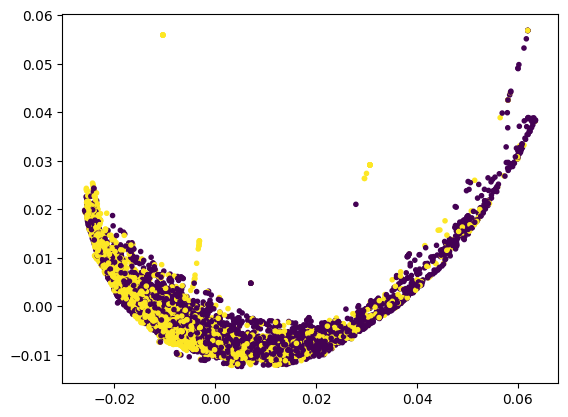

In [6]:
phate_operator = PHATE(n_components=2, n_jobs=10)

transformed_data = phate_operator.fit_transform(text_embeddings)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], marker="." , c=data["target"])


# KPCA

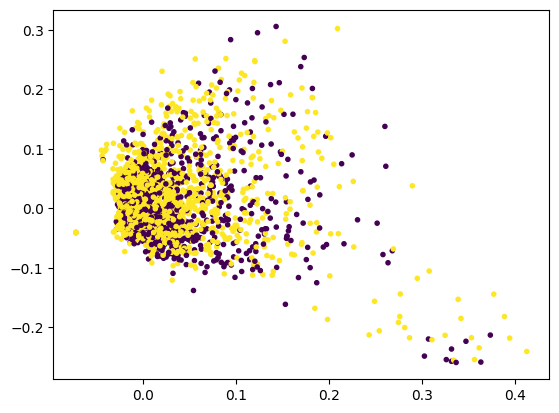

In [7]:
from sklearn.decomposition import KernelPCA

kpca_operator = KernelPCA(n_components=2, kernel="rbf", gamma=1, n_jobs=10)

transformed_data = kpca_operator.fit_transform(text_embeddings)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], marker=".", c=data["target"], cmap="viridis")
plt.show()

## UMAP

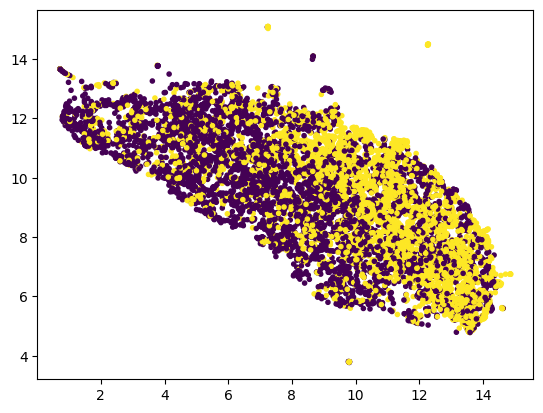

In [9]:
umap_operator = UMAP(n_components=2, n_jobs=10)

transformed_data = umap_operator.fit_transform(text_embeddings)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], marker=".", c=data["target"], cmap="viridis")
plt.show()

## TSNE

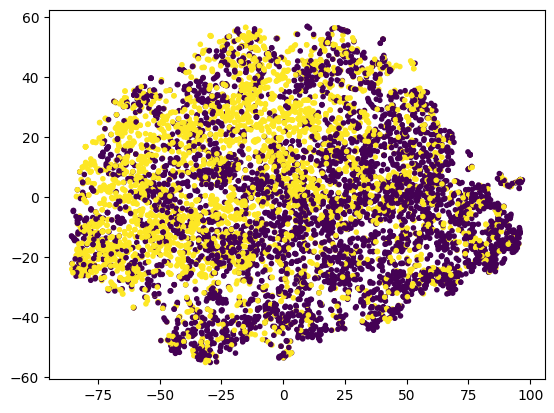

In [13]:
tsne_operator = TSNE(n_components=2, n_jobs=10)

transformed_data = tsne_operator.fit_transform(text_embeddings)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], marker=".", c=data["target"], cmap="viridis")
plt.show()